In [46]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [47]:
from sqlalchemy import create_engine, inspect

In [48]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [49]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [50]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [51]:
# reflect an existing database into a new model
Base = automap_base()

In [52]:
# reflect the tables
Base.prepare(engine,reflect=True)

In [53]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [54]:
# Save references to each table
measurement=Base.classes.measurement
station=Base.classes.station

In [55]:
# Create our session (link) from Python to the DB
session=Session(engine)

In [56]:
# Learn more about the databases
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [57]:
# Learn more about the database measurement
columns = inspector.get_columns('measurement')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [58]:
# Learn more about the database station
columns_s = inspector.get_columns('station')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


# Exploratory Precipitation Analysis

In [59]:
# how many dates do we have
session.query(func.count(measurement.date)).all()

[(19550)]

In [60]:
# Find the most recent date in the data set.
m_recent = engine.execute ('SELECT MAX(date) FROM Measurement').fetchall() 
print (f"Most Recent: {m_recent}")

Most Recent: [('2017-08-23',)]


In [61]:
# Find the first date in the data set.
f_date = engine.execute ('SELECT MIN(date) FROM Measurement').fetchall() 
print (f"First Date:", f_date)

First Date: [('2010-01-01',)]


In [62]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
query_date= dt.date (2017,8,23) - dt.timedelta(days=365)
print("Query Date One year:", query_date)

Query Date One year: 2016-08-23


In [63]:
# Perform a query to retrieve the data and precipitation scores
retrival= dt.date (2017,8,23) - dt.timedelta(days=365)
precp=session.query(measurement.date,measurement.prcp).filter(measurement.date>retrival).all()
for record in precp:
    print(record)

('2016-08-24', 0.08)
('2016-08-25', 0.08)
('2016-08-26', 0.0)
('2016-08-27', 0.0)
('2016-08-28', 0.01)
('2016-08-29', 0.0)
('2016-08-30', 0.0)
('2016-08-31', 0.13)
('2016-09-01', 0.0)
('2016-09-02', 0.0)
('2016-09-03', 0.0)
('2016-09-04', 0.03)
('2016-09-05', None)
('2016-09-06', None)
('2016-09-07', 0.05)
('2016-09-08', 0.0)
('2016-09-09', 0.03)
('2016-09-10', 0.0)
('2016-09-11', 0.05)
('2016-09-12', 0.0)
('2016-09-13', 0.02)
('2016-09-14', 1.32)
('2016-09-15', 0.42)
('2016-09-16', 0.06)
('2016-09-17', 0.05)
('2016-09-18', 0.0)
('2016-09-19', 0.0)
('2016-09-20', 0.0)
('2016-09-21', 0.0)
('2016-09-22', 0.02)
('2016-09-23', 0.0)
('2016-09-24', 0.0)
('2016-09-25', 0.0)
('2016-09-26', 0.06)
('2016-09-27', 0.02)
('2016-09-28', 0.0)
('2016-09-29', 0.0)
('2016-09-30', 0.0)
('2016-10-01', 0.0)
('2016-10-02', 0.0)
('2016-10-03', 0.0)
('2016-10-04', 0.0)
('2016-10-05', 0.0)
('2016-10-06', 0.0)
('2016-10-07', 0.0)
('2016-10-08', 0.0)
('2016-10-09', 0.0)
('2016-10-10', 0.0)
('2016-10-11', 0.0)
('

In [64]:
# Save the query results as a Pandas DataFrame and set the index to the date column
precp_df=pd.DataFrame(precp,columns=['date','precipitation'])
precp_df.set_index('date')

,precipitation
date,
2016-08-24,0.08
2016-08-25,0.08
2016-08-26,0.00
2016-08-27,0.00
2016-08-28,0.01
...,...
2017-08-19,0.09
2017-08-20,NaN
2017-08-21,0.56


In [65]:
# Sort the dataframe by date
precp_df = precp_df.sort_index(ascending=True)
precp_df

,date,precipitation
0,2016-08-24,0.08
1,2016-08-25,0.08
2,2016-08-26,0.00
3,2016-08-27,0.00
4,2016-08-28,0.01
...,...,...
2218,2017-08-19,0.09
2219,2017-08-20,NaN
2220,2017-08-21,0.56
2221,2017-08-22,0.50


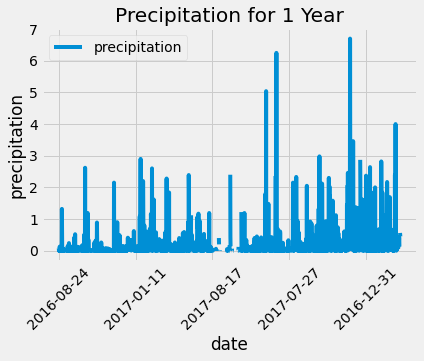

In [66]:
# Use Pandas Plotting with Matplotlib to plot the data

precp_df.plot('date','precipitation')
plt.title ('Precipitation for 1 Year')
plt.xlabel('date')
plt.ylabel('precipitation')
plt.rcParams["figure.figsize"] =(20,5)
plt.xticks(rotation=45)
plt.show()

In [67]:
# Use Pandas to calcualte the summary statistics for the precipitation data
precp_df.describe()

,precipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [68]:
# Design a query to calculate the total number stations in the dataset
session.query(func.count(station.id)).all()

[(9)]

In [69]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
active_s= session.query(measurement.station, func.count(measurement.station)).\
group_by(measurement.station).\
order_by(func.count(measurement.station).desc()).all()
active_s

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [70]:
m_active=session.query(measurement.station).group_by(measurement.station).\
    order_by(func.count(measurement.date).desc()).first()
m_active_s=m_active[0]
m_active_s

'USC00519281'

In [71]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
station_r = 'USC00519281'
session.query(func.min(measurement.tobs), func.max(measurement.tobs), func.avg(measurement.tobs)).filter(measurement.station == station_r).all()

[(54.0, 85.0, 71.66378066378067)]

In [75]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
station_winner = active_s[0][0]

results= session.query(measurement.date,measurement.tobs).\
    filter(measurement.date >="2016-08-23").\
    filter(measurement.date <="2017-08-23").\
    filter(measurement.station == station_winner).all()
results_win= pd.DataFrame(results)

<AxesSubplot:ylabel='Frequency'>

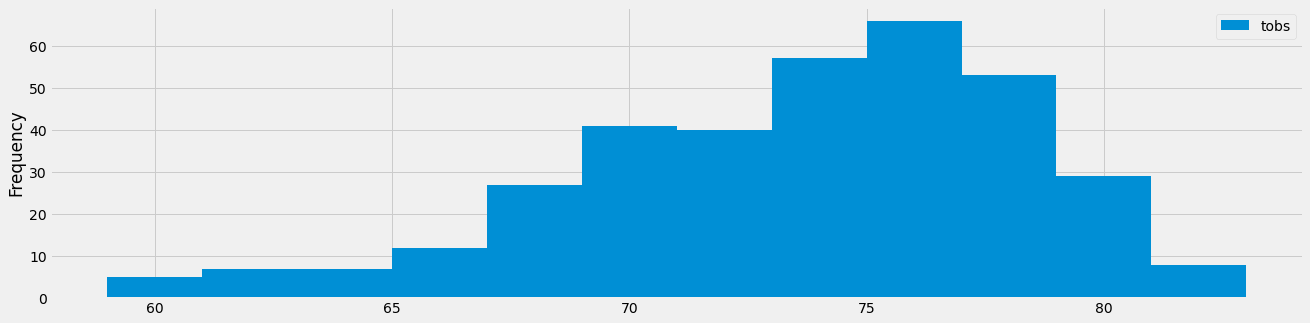

In [78]:
results_win.plot.hist(bins=12)

# Close session

In [79]:
# Close Session
session.close()